# 一个公司在一个投资机构的持仓历史变化

例如高瓴资本对拼多多的持仓历史变化

In [1]:
import pandas as pd
import numpy as np
import glob,os

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows',200)

In [4]:
file = glob.glob(os.path.join("13f-hr/000102916013F-HR??-??-20??.csv"))
print(len(file))

32


In [5]:
dl = []
dl10 = []
for f in file:
    dlTemp = pd.read_csv(f, usecols=['Name of Issuer', 'CUSIP', 'Value', 'SHRS OR SH', 'Date', 'Filing Manager', 'CIK'])
    dlTop10 = dlTemp.sort_values(by='Value', ascending=False, ignore_index=True).head(5)
    dl.append(dlTemp)
    dl10.append(dlTop10)

dlTotal = pd.concat(dl, ignore_index=True)
dlTotal10 = pd.concat(dl10, ignore_index=True)

In [6]:
# 统计高频持有的证券
print(dlTotal10['Name of Issuer'].value_counts())
print(dlTotal10['Name of Issuer'].describe())

SPDR S&P 500 ETF TR             20
LIBERTY BROADBAND CORP          20
ISHARES TR                      12
VICI PPTYS INC                   9
CAESARS ENTMT CORP               8
NUANCE COMMUNICATIONS INC        7
FIREEYE INC                      6
ALTABA INC                       6
TEVA PHARMACEUTICAL INDS LTD     5
YPF SOCIEDAD ANONIMA             5
DOW CHEM CO                      4
JDS UNIPHASE CORP                4
INVESCO QQQ TR                   4
D R HORTON INC                   4
TIBCO SOFTWARE INC               4
ADECOAGRO S A                    3
DIGITAL RIV INC                  3
ALIBABA GROUP HLDG LTD           3
HERBALIFE LTD                    2
ROVI CORP                        2
SELECT SECTOR SPDR TR            2
PALANTIR TECHNOLOGIES INC        2
ALPHABET INC                     2
ALLERGAN PLC                     1
TIME WARNER CABLE INC            1
CYPRESS SEMICONDUCTOR CORP       1
MICROSOFT CORP                   1
CIENA CORP                       1
OVERSTOCK COM INC DE

In [7]:
dlSingle = dlTotal[dlTotal['Name of Issuer']=='LIBERTY BROADBAND CORP'][['Date', 'Value']]

In [8]:
dateList = list(dlTotal['Date'].value_counts().index)
dateThis = list(dlSingle['Date'].value_counts().index)
dateDiff = [i for i in dateList if i not in dateThis]
dateDiff

['2014-06-30',
 '2014-03-31',
 '2014-09-30',
 '2015-06-30',
 '2015-12-31',
 '2013-12-31',
 '2013-09-30',
 '2015-09-30',
 '2016-03-31',
 '2015-03-31',
 '2013-06-30',
 '2014-12-31']

In [9]:
d = {'Date': dateDiff, 'Value': np.zeros(shape=(len(dateDiff))).astype(int)}
dlDate = pd.DataFrame(data=d)
dlSingleFull = pd.concat([dlSingle, dlDate]).sort_values(by=['Date']).reset_index(drop=True)

In [10]:
dlSingleFormat = dlSingleFull.replace(regex=r'-03-31$', value='Q1').replace(regex=r'-06-30$', value='Q2').replace(regex=r'-09-30$', value='Q3').replace(regex=r'-12-31$', value='Q4')

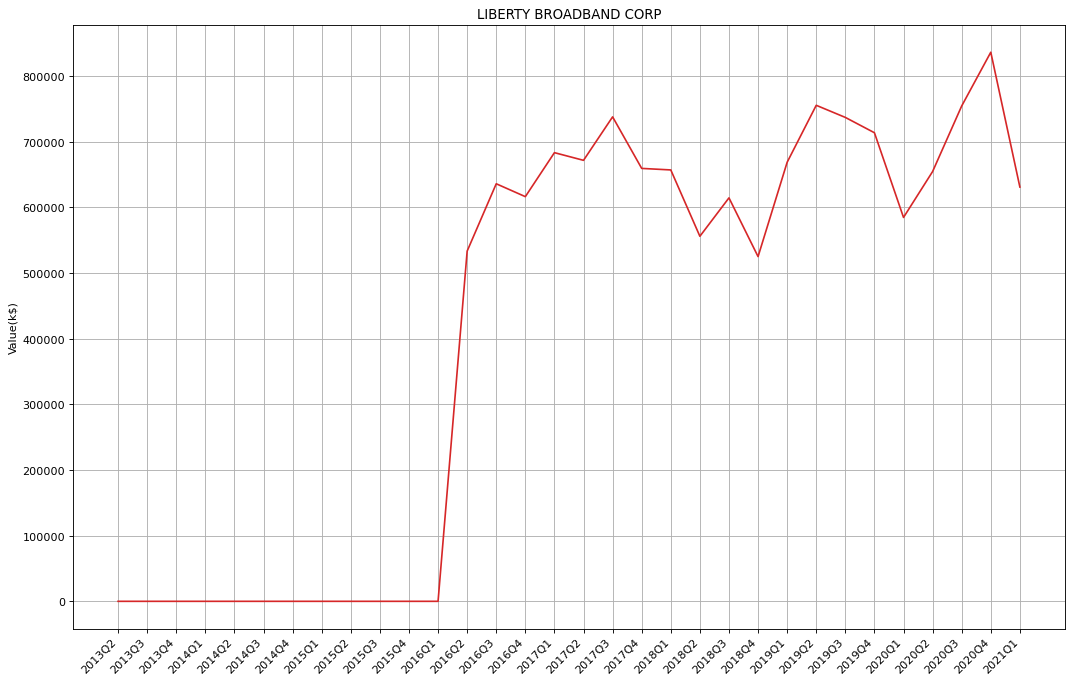

In [11]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.plot('Date', 'Value', data=dlSingleFormat, color='tab:red')
ax.set(ylabel='Value(k$)',
       title='LIBERTY BROADBAND CORP')
ax.grid()

plt.xticks(rotation=45, horizontalalignment='right')
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10)) 

fig.savefig("LIBERTY_BROADBAND_CORP.png")
plt.show()